In [6]:
import requests

URL = 'https://www.taifex.com.tw/cht/3/pcRatio'

r = requests.get(URL)

print(r.text)

ValueError: True is not in list

In [15]:
from bs4 import BeautifulSoup

In [16]:
soup = BeautifulSoup(r.text, 'html.parser')

In [86]:
K = [i for i in soup.find_all('tr')[6].find_all('tr')]

In [143]:
import pandas as pd
Matrix = pd.DataFrame(np.ones((len(K)-1,6)))
for i in range(len(K)-1):
    index = 0
    for j in K[i+1].find_all('td',align="center"):
        if index!=0:
            Matrix.iloc[i,index-1] = j.string.split('\t')[-1]
        index+=1

In [107]:
import pandas as pd
import numpy as np

In [114]:
[i.string.split('\t')[-1] for i in K[5].find_all('td',align="center")]

['2020/2/25', '748,678', '611,861', '122.36', '459,130', '327,185', '140.33']

In [185]:
Matrix.columns = [i.string for i in K[0].find_all('th')][1:]
Matrix.index = [K[i].find_all('td')[0].string for i in range(1,len(K))]
Matrix

,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
2020/3/3,"626,842","639,462",98.03,"506,292","373,077",135.71
2020/3/2,"617,210","584,567",105.58,"454,378","353,424",128.56
2020/2/27,"502,340","453,435",110.79,"407,701","284,916",143.10
2020/2/26,"957,387","804,123",119.06,"333,288","193,558",172.19
2020/2/25,"748,678","611,861",122.36,"459,130","327,185",140.33
2020/2/24,"480,336","426,986",112.49,"413,261","299,703",137.89
2020/2/21,"399,906","360,692",110.87,"384,755","240,611",159.91
2020/2/20,"327,977","319,024",102.81,"332,944","204,119",163.11
2020/2/19,"736,411","709,911",103.73,"255,122","138,577",184.10
2020/2/18,"524,546","506,021",103.66,"509,146","408,308",124.70


In [236]:
from io import StringIO
import datetime
import time
date = datetime.datetime.now()

def transfer_date(datestr):
    datestr = str(datestr).split(' ')[0].replace('-','')
    return datestr
L=[]
date_index=0
dataspan = len(Matrix.index)

while len(L)<dataspan:
    time.sleep(5)
    now_date = transfer_date(date-datetime.timedelta(days=date_index))
    
    try:
        URL1 = 'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date='+now_date+'&type=ALL'
        r1 = requests.post(URL1)
        L.append([t[13:22] for t in r1.text.split('\r\n') if "發行量加權股價指數" in t][0])
    except:
        print('Fails at'+' '+str(transfer_date(now_date)))
    
    date_index+=1

Fails at 20200301
Fails at 20200229
Fails at 20200228
Fails at 20200223
Fails at 20200222
Fails at 20200216
Fails at 20200215
Fails at 20200209
Fails at 20200208


In [238]:
Matrix['大盤指數'] = L

In [257]:
for i in range(len(Matrix.index)):
    Matrix.iloc[:,0][i] = Matrix.iloc[:,0][i].split(',')[0]+Matrix.iloc[:,0][i].split(',')[1]
    Matrix.iloc[:,1][i] = Matrix.iloc[:,1][i].split(',')[0]+Matrix.iloc[:,1][i].split(',')[1]
    Matrix.iloc[:,3][i] = Matrix.iloc[:,3][i].split(',')[0]+Matrix.iloc[:,3][i].split(',')[1]
    Matrix.iloc[:,4][i] = Matrix.iloc[:,4][i].split(',')[0]+Matrix.iloc[:,4][i].split(',')[1]
    Matrix.iloc[:,6][i] = Matrix.iloc[:,6][i].split(',')[0]+Matrix.iloc[:,6][i].split(',')[1]

In [282]:
for i in range(7):
    Matrix.iloc[:,i] = pd.to_numeric(Matrix.iloc[:,i])

In [285]:
Matrix = Matrix.iloc[::-1]

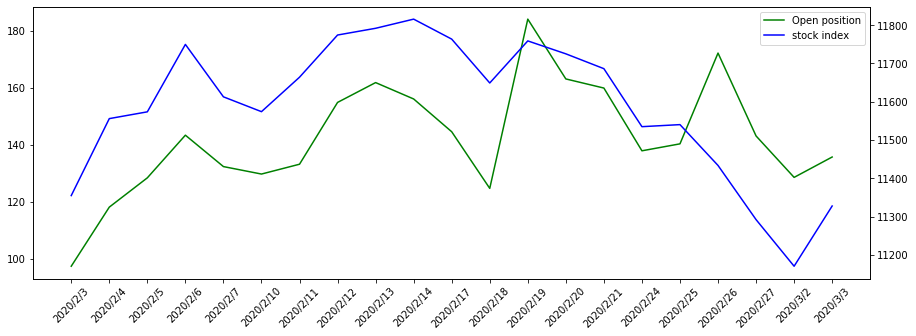

In [310]:
# import numpy as np

# x = np.arange(0,10,0.1)
# y1=0.05*x**2
# y2=-1*y1

import matplotlib.pyplot as plt

fig,ax1 = plt.subplots(figsize=(15,5))

plt.xticks(rotation=45) 

ax2 = ax1.twinx()
ax1, = ax1.plot(Matrix.index,Matrix.iloc[:,-2],'g')
ax2, = ax2.plot(Matrix.index,Matrix.iloc[:,-1],'b')

plt.legend([ax1,ax2],['Open position','stock index'],loc='best')

plt.show()